# Support Vector Machine (SVM)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


Populating the interactive namespace from numpy and matplotlib


## Importing the dataset

In [2]:
iris = datasets.load_iris()
print(iris)
# We'll use the petal length and width only for this analysis
X = iris.data[:, [2, 3]]
y = iris.target


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Exploratory Data Analysis
###  Place the iris data into a pandas dataframe

In [3]:
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

# View the first 5 rows of the data
print(iris_df.head())

# Print the unique labels of the dataset
print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))


   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

The unique labels in this data are [0 1 2]


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))


There are 105 samples in the training set and 45 samples in the test set


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())


After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


## Plot the original Data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


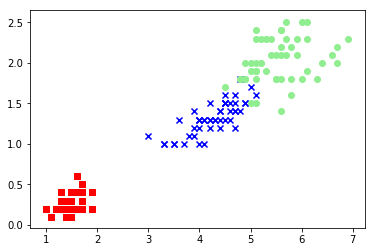

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)
    

### If we plot the original data, we can see that one of the classes is linearly separable, but the other two are not.

## Training the SVM model on the Training set

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### Dispplay the support Vectors of model

In [13]:
print("Support Vector for model are :",svm.support_vectors_)

Support Vector for model are : [[-1.18520034 -1.32360858]
 [-1.29656144 -1.06600172]
 [-1.18520034 -1.06600172]
 [-1.18520034 -0.93719829]
 [-1.29656144 -1.06600172]
 [-1.29656144 -1.06600172]
 [-0.18295039 -0.29318114]
 [ 0.48521625  0.47963944]
 [-0.01590873 -0.16437771]
 [ 0.48521625  0.22203258]
 [ 0.37385514  0.47963944]
 [ 0.20681348  0.09322915]
 [ 0.42953569  0.22203258]
 [ 0.59657735  0.35083601]
 [-0.46135315 -0.16437771]
 [ 0.37385514  0.35083601]
 [ 0.20681348  0.09322915]
 [ 0.37385514  0.09322915]
 [ 0.31817459  0.22203258]
 [ 0.26249403  0.09322915]
 [-0.29431149 -0.29318114]
 [ 0.31817459  0.22203258]
 [-0.18295039 -0.29318114]
 [ 0.59657735  0.35083601]
 [ 0.6522579   0.60844287]
 [-0.07158928 -0.29318114]
 [ 0.42953569  0.09322915]
 [ 0.5408968   0.7372463 ]
 [ 0.31817459  0.09322915]
 [ 0.93066067  0.7372463 ]
 [ 0.6522579   0.35083601]
 [ 1.09770233  0.7372463 ]
 [ 0.59657735  0.7372463 ]
 [ 0.70793846  0.35083601]
 [ 0.37385514  0.60844287]
 [ 0.6522579   0.8660497

In [17]:
print("Number of suppoort Vectors of each class 0 : - ",svm.n_support_[0])
print("Number of suppoort Vectors of each class 1 : - ",svm.n_support_[1])
print("Number of suppoort Vectors of each class 2 : - ",svm.n_support_[2])

Number of suppoort Vectors of each class 0 : -  6
Number of suppoort Vectors of each class 1 : -  23
Number of suppoort Vectors of each class 2 : -  17


In [20]:
print("Indices for support vectors are : ",svm.support_)

Indices for support vectors are :  [ 27  28  56  66  68  99   0   7   8  13  15  18  21  29  32  34  36  63
  64  67  70  72  84  87  88  90  94  96  97   1   3   4   9  10  11  12
  14  17  25  31  44  49  53  74  92 101]


## Finding Accuracy of model on Test and Train Set

In [8]:
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


## Finding Accuracy of model on using confiusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix = metrics.confusion_matrix(y_test, svm.predict(X_test_std))
print(confusion_matrix)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [41]:
Accuracy = metrics.accuracy_score(y_test, svm.predict(X_test_std))
Precision = metrics.precision_score(y_test, svm.predict(X_test_std),average='macro')
Sensitivity_recall = metrics.recall_score(y_test, svm.predict(X_test_std),average='macro')
Specificity = metrics.recall_score(y_test, svm.predict(X_test_std), pos_label=0,average='macro')
F1_score = metrics.f1_score(y_test, svm.predict(X_test_std),average='macro')

{'Accuracy': 0.9777777777777777, 'Precision': 0.9722222222222222, 'Sensitivity_recall': 0.9814814814814815, 'Specificity': 0.9814814814814815, 'F1_score': 0.975983436853002}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [54]:
#metrics
print({"Accuracy":Accuracy,
       "Precision":Precision,
       "Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,
       "F1_score":F1_score},end = "")

{'Accuracy': 0.9777777777777777, 'Precision\n': 0.9722222222222222, 'Sensitivity_recall': 0.9814814814814815, 'Specificity': 0.9814814814814815, 'F1_score': 0.975983436853002}	

## Create the function for Visualizing Testing and Training model

In [9]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
plt.show()


## Visualising the Train set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


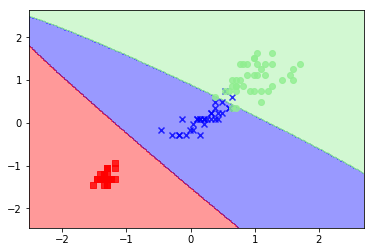

In [10]:
plot_decision_regions(X_train_std, y_train, svm)

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


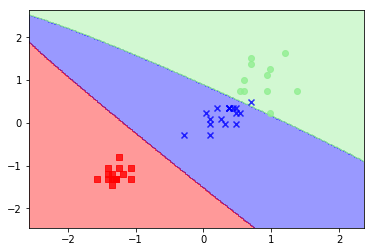

In [11]:
plot_decision_regions(X_test_std, y_test, svm)